<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/book_codes_for_nlp_msc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SENTIMENT ANALYSIS

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


##SENTIMENT ANALYSIS USING VADER

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()
text_1 = "This juice is super sweet!"
text_2 =  "This chips tastes terrible!"
text_1_scores = analyzer.polarity_scores(text_1)
text_2_scores = analyzer.polarity_scores(text_2)
print("Sentiment of text 1:", text_1_scores)
print("Sentiment of text 2:", text_2_scores)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.8016}
Sentiment of text 2: {'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'compound': -0.5255}


## SENTIMENT ANALYSIS USING SVM

In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
# Set the path to the file you'd like to load
file_path = "movie.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/imdb-movie-ratings-sentiment-analysis",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2986703455.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


In [ ]:
df = df.sample(frac=0.2)

In [ ]:
df

,text,label
11047,Wow. this movie is the voice of a climbing gen...,1
26951,People comparing this movie to big blockbuster...,1
14940,OK its not the best film I've ever seen but at...,0
21046,Black comedy isn't always an easy sell. Every ...,1
36440,This is easily one of the worst films I've see...,0
...,...,...
204,"Though I have watched Salò, I do not know if e...",0
7781,haha! you have to just smile and smile if you ...,0
11266,"A family (mother-Patricia Clarkson, father-Jak...",1
10835,I first saw this when I was a teen in my last ...,1


###Trained with TF-IDF and SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
np.random.seed(111)
# Step 1: Load and preprocess the dataset
text = df['text'].values
labels = df['label'].values

# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=40)

# Step 3: Convert text data into numerical feature vectors
vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(text_train)
features_test = vectorizer.transform(text_test)
print(f"{features_train = }")
# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)

# Step 6: Predict sentiment on new data
predictions = svm.predict(features_test)
new_text = ["I love this movie!", "This product is terrible.", "The food was great."]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(f"{new_predictions = }")

# Step 7: Generate the classification report to evaluate the model
print("CLASSIFICATION REPORT:")
print(classification_report(labels_test, predictions))

features_train = <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 861092 stored elements and shape (6400, 42506)>
new_predictions = array([1, 0, 1])
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       777
           1       0.88      0.90      0.89       823

    accuracy                           0.89      1600
   macro avg       0.89      0.89      0.89      1600
weighted avg       0.89      0.89      0.89      1600



###Trained with BoW and SVM

In [ ]:
# code reference from: https://how.dev/answers/how-to-use-svm-for-sentiment-analysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
np.random.seed(111)
# Step 1: Load and preprocess the dataset
text = df['text'].values
labels = df['label'].values

# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=40)

# Step 3: Convert text data into numerical feature vectors
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(text_train)
features_test = vectorizer.transform(text_test)
print(f"{features_train = }")
# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)

# Step 6: Predict sentiment on new data
predictions = svm.predict(features_test)
new_text = ["I love this movie!", "This product is terrible.", "The food was great."]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(f"{new_predictions = }")

# Step 7: Generate the classification report to evaluate the model
print("CLASSIFICATION REPORT:")
print(classification_report(labels_test, predictions))

features_train = <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 861092 stored elements and shape (6400, 42506)>
new_predictions = array([0, 0, 1])
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       777
           1       0.85      0.85      0.85       823

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



###different randomly sampled portion of data trained with SVM and limited BoW features (30,000)

In [ ]:
# code reference from: https://how.dev/answers/how-to-use-svm-for-sentiment-analysis

#carried out with different/another randomly sampled portion of the data

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
np.random.seed(101)
# Step 1: Load and preprocess the dataset
text = df['text'].values
labels = df['label'].values

# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=40)

# Step 3: Convert text data into numerical feature vectors
vectorizer = CountVectorizer(max_features=30000)
features_train = vectorizer.fit_transform(text_train)
features_test = vectorizer.transform(text_test)

# Step 4: Train the SVM model
svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)

# Step 6: Predict sentiment on new data
predictions = svm.predict(features_test)
new_text = ["I love this movie!", "This product is terrible.", "The food was delicious."]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(f"{new_predictions = }")

# Step 7: Generate the classification report to evaluate the model
print("CLASSIFICATION REPORT:")
print(classification_report(labels_test, predictions))

new_predictions = array([1, 0, 1])
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       812
           1       0.83      0.84      0.83       788

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:
features_train
#SIZE OF VECTORIZED TRAIN SET

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 861952 stored elements and shape (6400, 30000)>

#SPAM DETECTION

In [ ]:
#reference code from: https://www.kaggle.com/discussions/general/74235

In [ ]:
from google.colab import userdata
import os
#access the kaggle api and associated username from colab secrets
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
#download the kaggle sms spam dataset
!kaggle datasets download -d uciml/sms-spam-collection-dataset

In [ ]:
#unzip the dataset folder to fetch the dataset
!unzip "sms-spam-collection-dataset.zip"

#read the dataset into pandas dataframe and rename the columns as per convenience
import pandas as pd
df = pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']] #select 'v1' and 'v2' columns since they are the appropriate columns for our task
df.columns = ['label','text']  #rename the columns
df.label.value_counts() #check the spam-ham counts in the dataset
#There is a major imbalance in the dataset.

,count
label,
ham,4825
spam,747


In [ ]:
df.shape
#shape of imbalanced dataset

(5572, 2)

In [ ]:
df.sample(5)

,label,text
2373,spam,XMAS Prize draws! We are trying to contact U. ...
1942,ham,K...k:)why cant you come here and search job:)
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...
1900,ham,And miss vday the parachute and double coins??...
1564,ham,Tmrw. Im finishing 9 doors


In [ ]:
#undersample 'ham' texts to balance the dataset
df2 = pd.concat((df[df['label']=='ham'].sample(747),df[df['label']=='spam'].sample(747)),axis=0)
df2.label.value_counts() #check the spam-ham count in the balanced dataset

,count
label,
ham,747
spam,747


In [ ]:
df2.shape
#shape of balanced dataset

(1494, 2)

## SPAM FILTERING WITH IMBALANCED DATASET

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import numpy as np
np.random.seed(101)

# Step 1: Load and preprocess the dataset
text = df['text'].values
labels = df['label'].values

# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=40)

# Step 3: Convert text data into numerical feature vectors
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(text_train)
features_test = vectorizer.transform(text_test)

# Step 4: Train the Multinomial Naive Bayes model
nbc = MultinomialNB()
nbc.fit(features_train, labels_train)

# Step 6: Predict sentiment on new data
predictions = nbc.predict(features_test)
new_text = ["Free entry to win lottery!", "Crazy offer! Apply now!", "Meeting is next week"]
new_features = vectorizer.transform(new_text)
new_predictions = nbc.predict(new_features)
print(f"{new_predictions = }")

# Step 7: Generate the classification report to evaluate the model
print("CLASSIFICATION REPORT:")
print(classification_report(labels_test, predictions))

new_predictions = array(['spam', 'spam', 'ham'], dtype='<U4')
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       967
        spam       0.97      0.90      0.93       148

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



##SPAM FILTERING WITH BALANCED DATASET

In [ ]:
text = df2['text'].values
labels = df2['label'].values

# Step 2: Split the dataset into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=40)

# Step 3: Convert text data into numerical feature vectors
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(text_train)
features_test = vectorizer.transform(text_test)

# Step 4: Train the Multinomial Naive Bayes model
nbc = MultinomialNB()
nbc.fit(features_train, labels_train)

# Step 6: Predict sentiment on new data
predictions = nbc.predict(features_test)
new_text = ["Free entry to win lottery!", "Crazy offer! Apply now!", "Meeting is next week"]
new_features = vectorizer.transform(new_text)
new_predictions = nbc.predict(new_features)
print(f"{new_predictions = }")

# Step 7: Generate the classification report to evaluate the model
print("CLASSIFICATION REPORT:")
print(classification_report(labels_test, predictions))

new_predictions = array(['spam', 'spam', 'ham'], dtype='<U4')
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         ham       0.98      0.97      0.98       157
        spam       0.97      0.98      0.98       142

    accuracy                           0.98       299
   macro avg       0.98      0.98      0.98       299
weighted avg       0.98      0.98      0.98       299



#TOPIC MODELLING

##LDA

reference codes from:
- https://www.geeksforgeeks.org/machine-learning/Latent-Dirichlet-Allocation-and-Topic-Modelling/
- https://stackoverflow.com/questions/63777101/topic-wise-document-distribution-in-gensim-lda

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 

In [ ]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt

nltk.download('stopwords')

/usr/local/lib/python3.11/dist-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/usr/local/lib/python3.11/dist-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-t

True

In [ ]:
# Create a sample dataset
data = {
    'text': [
        'Japan is home to some wonderful wildlife!',
        'The Japanese people have a deep affection for the beauty of the landscape.',
        'Almost four-fifths of Japan is covered with mountains.',
        'In some countries, hiking is used as a test of fitness',
        'Nail art is a creative way to paint and decorate nails',
        'Nails that end in a rounded point, making the fingers appear longer.',
        'Machine learning is a subset of artificial intelligence.',
        'Artificial intelligence and machine learning are popular topics.',
        'Deep learning is a type of machine learning.',
        'I enjoy hiking and outdoor activities.'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('sample_dataset.csv', index=False)

#Intialize stopwords
stop_words = stopwords.words('english')

#Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Load data
data = pd.read_csv('sample_dataset.csv')  # Load the sample dataset

# Preprocess the text data
def preprocess_text(text):
    #text = re.sub('\s+', ' ', text)  # Remove extra spaces
    #text = re.sub('\S*@\S*\s?', '', text)  # Remove emails
    #text = re.sub('\'', '', text)  # Remove apostrophes
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data['text'].apply(preprocess_text)  # Replace 'text_column' with your column name

# Tokenize and remove stopwords

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data['tokens'] = data['cleaned_text'].apply(tokenize)

# Lemmatization using nltk

def lemmatize(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

data['lemmas'] = data['tokens'].apply(lemmatize)

# Create dictionary and corpus
id2word = corpora.Dictionary(data['lemmas'])
texts = data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=4,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto')
                                            #per_word_topics=True)

topics = lda_model.print_topics(num_words=10)

In [ ]:
pd.DataFrame({'text':data['text'].values,'expected_topic_labels':[0,0,0,1,2,2,3,3,3,1]})

,text,expected_topic_labels
0,Japan is home to some wonderful wildlife!,0
1,The Japanese people have a deep affection for ...,0
2,Almost four-fifths of Japan is covered with mo...,0
3,"In some countries, hiking is used as a test of...",1
4,Nail art is a creative way to paint and decora...,2
5,"Nails that end in a rounded point, making the ...",2
6,Machine learning is a subset of artificial int...,3
7,Artificial intelligence and machine learning a...,3
8,Deep learning is a type of machine learning.,3
9,I enjoy hiking and outdoor activities.,1


In [ ]:
texts

,lemmas
0,"[japan, home, wonderful, wildlife]"
1,"[japanese, people, deep, affection, beauty, la..."
2,"[almost, four, fifth, japan, covered, mountain]"
3,"[country, hiking, used, test, fitness]"
4,"[nail, art, creative, way, paint, decorate, nail]"
5,"[nail, end, rounded, point, making, finger, ap..."
6,"[machine, learning, subset, artificial, intell..."
7,"[artificial, intelligence, machine, learning, ..."
8,"[deep, learning, type, machine, learning]"
9,"[enjoy, hiking, outdoor, activity]"


In [ ]:
data[['lemmas']]

,lemmas
0,"[japan, home, wonderful, wildlife]"
1,"[japanese, people, deep, affection, beauty, la..."
2,"[almost, four, fifth, japan, covered, mountain]"
3,"[country, hiking, used, test, fitness]"
4,"[nail, art, creative, way, paint, decorate, nail]"
5,"[nail, end, rounded, point, making, finger, ap..."
6,"[machine, learning, subset, artificial, intell..."
7,"[artificial, intelligence, machine, learning, ..."
8,"[deep, learning, type, machine, learning]"
9,"[enjoy, hiking, outdoor, activity]"


In [ ]:
data[['tokens']]

,tokens
0,"[japan, home, wonderful, wildlife]"
1,"[japanese, people, deep, affection, beauty, la..."
2,"[almost, four, fifths, japan, covered, mountains]"
3,"[countries, hiking, used, test, fitness]"
4,"[nail, art, creative, way, paint, decorate, na..."
5,"[nails, end, rounded, point, making, fingers, ..."
6,"[machine, learning, subset, artificial, intell..."
7,"[artificial, intelligence, machine, learning, ..."
8,"[deep, learning, type, machine, learning]"
9,"[enjoy, hiking, outdoor, activities]"


In [ ]:
data[['cleaned_text']]

,cleaned_text
0,japan is home to some wonderful wildlife
1,the japanese people have a deep affection for ...
2,almost four fifths of japan is covered with mo...
3,in some countries hiking is used as a test of...
4,nail art is a creative way to paint and decora...
5,nails that end in a rounded point making the ...
6,machine learning is a subset of artificial int...
7,artificial intelligence and machine learning a...
8,deep learning is a type of machine learning
9,i enjoy hiking and outdoor activities


In [ ]:
# Print the topics
pd.DataFrame(topics,columns=['topic_id','topic_terms'])

,topic_id,topic_terms
0,0,"0.062*""country"" + 0.062*""used"" + 0.062*""wildli..."
1,1,"0.157*""learning"" + 0.120*""machine"" + 0.083*""in..."
2,2,"0.125*""nail"" + 0.069*""way"" + 0.069*""art"" + 0.0..."
3,3,"0.036*""japan"" + 0.036*""deep"" + 0.036*""nail"" + ..."


In [ ]:
# Compute coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data['lemmas'], dictionary=id2word, coherence='c_v')
coherence_lda_score = coherence_model_lda.get_coherence()
print(f"{coherence_lda_score = }")

coherence_lda_score = 0.5451390450840745


In [ ]:
data

,text,cleaned_text,tokens,lemmas
0,Japan is home to some wonderful wildlife!,japan is home to some wonderful wildlife,"[japan, home, wonderful, wildlife]","[japan, home, wonderful, wildlife]"
1,The Japanese people have a deep affection for ...,the japanese people have a deep affection for ...,"[japanese, people, deep, affection, beauty, la...","[japanese, people, deep, affection, beauty, la..."
2,Almost four-fifths of Japan is covered with mo...,almost four fifths of japan is covered with mo...,"[almost, four, fifths, japan, covered, mountains]","[almost, four, fifth, japan, covered, mountain]"
3,"In some countries, hiking is used as a test of...",in some countries hiking is used as a test of...,"[countries, hiking, used, test, fitness]","[country, hiking, used, test, fitness]"
4,Nail art is a creative way to paint and decora...,nail art is a creative way to paint and decora...,"[nail, art, creative, way, paint, decorate, na...","[nail, art, creative, way, paint, decorate, nail]"
5,"Nails that end in a rounded point, making the ...",nails that end in a rounded point making the ...,"[nails, end, rounded, point, making, fingers, ...","[nail, end, rounded, point, making, finger, ap..."
6,Machine learning is a subset of artificial int...,machine learning is a subset of artificial int...,"[machine, learning, subset, artificial, intell...","[machine, learning, subset, artificial, intell..."
7,Artificial intelligence and machine learning a...,artificial intelligence and machine learning a...,"[artificial, intelligence, machine, learning, ...","[artificial, intelligence, machine, learning, ..."
8,Deep learning is a type of machine learning.,deep learning is a type of machine learning,"[deep, learning, type, machine, learning]","[deep, learning, type, machine, learning]"
9,I enjoy hiking and outdoor activities.,i enjoy hiking and outdoor activities,"[enjoy, hiking, outdoor, activities]","[enjoy, hiking, outdoor, activity]"


In [ ]:
d_tmp={}
data_copy = data.copy()
for i in range(len(corpus)):
  lis=np.array(lda_model.get_document_topics(corpus[i]))
  topic_no = lis[:,0][np.argmax(lis[:,1])]
  data_copy.loc[i,'topic_no']=topic_no
data_copy #

,text,cleaned_text,tokens,lemmas,topic_no
0,Japan is home to some wonderful wildlife!,japan is home to some wonderful wildlife,"[japan, home, wonderful, wildlife]","[japan, home, wonderful, wildlife]",0.0
1,The Japanese people have a deep affection for ...,the japanese people have a deep affection for ...,"[japanese, people, deep, affection, beauty, la...","[japanese, people, deep, affection, beauty, la...",3.0
2,Almost four-fifths of Japan is covered with mo...,almost four fifths of japan is covered with mo...,"[almost, four, fifths, japan, covered, mountains]","[almost, four, fifth, japan, covered, mountain]",3.0
3,"In some countries, hiking is used as a test of...",in some countries hiking is used as a test of...,"[countries, hiking, used, test, fitness]","[country, hiking, used, test, fitness]",0.0
4,Nail art is a creative way to paint and decora...,nail art is a creative way to paint and decora...,"[nail, art, creative, way, paint, decorate, na...","[nail, art, creative, way, paint, decorate, nail]",2.0
5,"Nails that end in a rounded point, making the ...",nails that end in a rounded point making the ...,"[nails, end, rounded, point, making, fingers, ...","[nail, end, rounded, point, making, finger, ap...",3.0
6,Machine learning is a subset of artificial int...,machine learning is a subset of artificial int...,"[machine, learning, subset, artificial, intell...","[machine, learning, subset, artificial, intell...",1.0
7,Artificial intelligence and machine learning a...,artificial intelligence and machine learning a...,"[artificial, intelligence, machine, learning, ...","[artificial, intelligence, machine, learning, ...",1.0
8,Deep learning is a type of machine learning.,deep learning is a type of machine learning,"[deep, learning, type, machine, learning]","[deep, learning, type, machine, learning]",1.0
9,I enjoy hiking and outdoor activities.,i enjoy hiking and outdoor activities,"[enjoy, hiking, outdoor, activities]","[enjoy, hiking, outdoor, activity]",3.0


In [ ]:
data_copy[['text','topic_no']]

,text,topic_no
0,Japan is home to some wonderful wildlife!,0.0
1,The Japanese people have a deep affection for ...,3.0
2,Almost four-fifths of Japan is covered with mo...,3.0
3,"In some countries, hiking is used as a test of...",0.0
4,Nail art is a creative way to paint and decora...,2.0
5,"Nails that end in a rounded point, making the ...",3.0
6,Machine learning is a subset of artificial int...,1.0
7,Artificial intelligence and machine learning a...,1.0
8,Deep learning is a type of machine learning.,1.0
9,I enjoy hiking and outdoor activities.,3.0


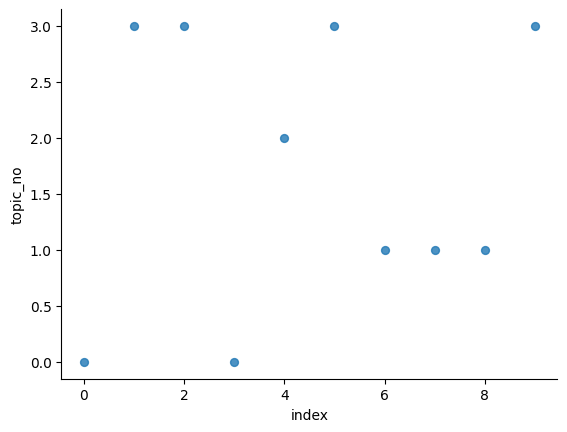

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='topic_no', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

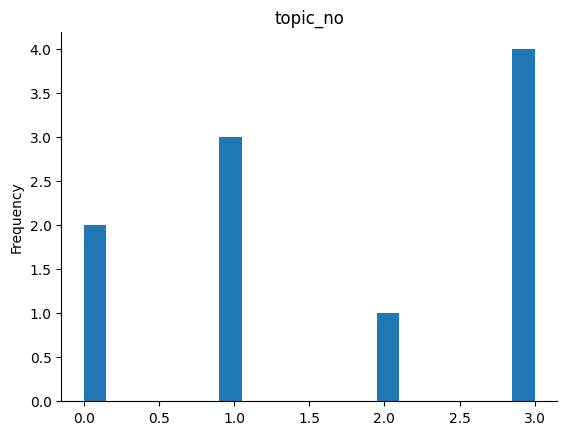

In [ ]:
from matplotlib import pyplot as plt
_df_1['topic_no'].plot(kind='hist', bins=20, title='topic_no')
plt.gca().spines[['top', 'right',]].set_visible(False)
#frequency of topics

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(1, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1)],
 [(23, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(33, 1), (34, 1), (35, 1), (36, 1), (38, 1), (39, 1)],
 [(6, 1), (35, 2), (36, 1), (40, 1)],
 [(17, 1), (41, 1), (42, 1), (43, 1)]]

In [ ]:
# setup: get the model's topics in their native ordering...
all_topics = lda_model.print_topics()
# ...then create a empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]

# now, for every doc...
for doc_id, doc_bow in enumerate(corpus):
    # ...get its topics...
    doc_topics = lda_model.get_document_topics(doc_bow)
    # ...& for each of its topics...
    for topic_id, score in doc_topics:
        # ...add the doc_id & its score to the topic's doc list
        docs_per_topic[topic_id].append((doc_id, score))

In [ ]:
print(docs_per_topic[0])

[(0, 0.9326641), (1, 0.01218519), (2, 0.01218527), (3, 0.9452013), (4, 0.010532247), (6, 0.0144534325), (7, 0.012185152), (8, 0.014453434), (9, 0.01775961)]


In [ ]:
for doc_list in docs_per_topic:
    doc_list.sort(key=lambda id_and_score: id_and_score[1], reverse=True)

In [ ]:
print(docs_per_topic[0][:10])
#Topic 0

[(3, 0.9452013), (0, 0.9326641), (9, 0.01775961), (8, 0.014453434), (6, 0.0144534325), (2, 0.01218527), (1, 0.01218519), (7, 0.012185152), (4, 0.010532247)]


In [ ]:
print(docs_per_topic[1][:10])
#Topic 1

[(7, 0.9576202), (6, 0.9497312), (8, 0.94971865), (9, 0.023313906), (0, 0.023313763), (3, 0.018973863), (1, 0.01599766), (2, 0.01599625), (4, 0.013826263), (5, 0.012174864)]


In [ ]:
print(docs_per_topic[2][:10])
#Topic 2

[(4, 0.9574125), (9, 0.013276241), (0, 0.013276212), (3, 0.010804823), (8, 0.010804813), (6, 0.0108048115)]


In [ ]:
print(docs_per_topic[3][:10])
#Topic 3

[(5, 0.9716179), (2, 0.9627093), (1, 0.962708), (9, 0.9456502), (0, 0.03074589), (8, 0.02502308), (3, 0.025019977), (6, 0.025010593), (7, 0.02108551), (4, 0.018228974)]


###TOPIC VISUALIZATION USING LDA

In [ ]:
total_docs = len(corpus)

In [ ]:
if total_docs > 0:
    pyLDAvis.enable_notebook()
    vis_data = gensimvis.prepare(lda_model, corpus, id2word)
    vis_data
    pyLDAvis.save_html(vis_data, 'lda_visualization.html')
else:
    print("No documents for visualization.")

In [ ]:
!pip install topic-wizard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.8/500.8 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Pillow
    Found existing

In [ ]:
from sklearn.pipeline import Pipeline
import topicwizard
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")


vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)


lda = LatentDirichletAllocation(n_components=4,
    random_state=0)

topic_pipeline = Pipeline(
    [
        ("vectorizer", vectorizer),
        ("topic_model", lda),
    ]
)

corpus = dataset.data

from topicwizard.pipeline import make_topic_pipeline

topic_pipeline = make_topic_pipeline(vectorizer, lda)

topicwizard.visualize(corpus, model=topic_pipeline)

3387 documents - 4 categories
Preprocessing
Inferring topical content for documents.


<IPython.core.display.Javascript object>

Open in browser:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<Thread(Thread-14 (_run_silent), stopped 134909339362880)>

In [ ]:
#load the saved topic wizard data
topicwizard.load(filename="topic_data.joblib")

##TOPIC CLUSTERING WITH K MEANS

In [ ]:
#code reference from: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html
#https://codesignal.com/learn/courses/k-means-clustering-decoded/lessons/visualizing-k-means-clustering-on-an-iris-dataset-with-matplotlib

In [ ]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 3387, n_features: 7929


In [ ]:
from collections import defaultdict
from time import time
from sklearn.cluster import KMeans
from sklearn import metrics

evaluations = []
evaluations_std = []

def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [ ]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [ 481  675 1785  446]
Number of elements assigned to each cluster: [1689  638  480  580]
Number of elements assigned to each cluster: [   1    1    1 3384]
Number of elements assigned to each cluster: [1887  311  332  857]
Number of elements assigned to each cluster: [ 291  673 1771  652]

True number of documents in each category according to the class labels: [799 973 987 628]


In [ ]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans with tf-idf vectors")

clustering done in 0.31 ± 0.10 s 
Homogeneity: 0.349 ± 0.010
Completeness: 0.398 ± 0.009
V-measure: 0.372 ± 0.009
Adjusted Rand-Index: 0.203 ± 0.017
Silhouette Coefficient: 0.007 ± 0.000


##HIERARCHICAL TOPIC CLUSTERING

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
np.random.seed(101)
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 3387, n_features: 7929


In [ ]:
ag = AgglomerativeClustering(n_clusters = true_k).fit(X_tfidf.toarray())
cluster_ids, cluster_sizes = np.unique(ag.labels_, return_counts=True)
print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements assigned to each cluster: [2100  324   18  945]
True number of documents in each category according to the class labels: [799 973 987 628]


In [ ]:
from collections import defaultdict
from time import time
from sklearn import metrics

evaluations = []
evaluations_std = []

def fit_and_evaluate(ag, X, name=None, n_runs=5):
    name = ag.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        #ag.set_params(random_state=seed)
        t0 = time()
        ag.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, ag.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, ag.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, ag.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, ag.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, ag.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [ ]:
ag = AgglomerativeClustering(n_clusters = true_k)

In [ ]:
fit_and_evaluate(ag, X_tfidf.toarray(), name="Agglomerative clustering with tf-idf vectors")

clustering done in 29.25 ± 4.36 s 
Homogeneity: 0.279 ± 0.000
Completeness: 0.422 ± 0.000
V-measure: 0.336 ± 0.000
Adjusted Rand-Index: 0.216 ± 0.000
Silhouette Coefficient: 0.009 ± 0.001
